In [ ]:
!pip install bs4

In [ ]:
import bs4
import requests

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_and_their_capitals_in_native_languages"
res = requests.get(url)

In [ ]:
res.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of countries and dependencies and their capitals in native languages - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pi

In [ ]:
soup = bs4.BeautifulSoup(res.content)

In [ ]:
type(soup)

bs4.BeautifulSoup

In [ ]:
soup.title

<title>List of countries and dependencies and their capitals in native languages - Wikipedia</title>

In [ ]:
soup.h1

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">List of countries and dependencies and their capitals in native languages</span></h1>

In [ ]:
soup.title.text

'List of countries and dependencies and their capitals in native languages - Wikipedia'

In [ ]:
soup.table.text

"This article has multiple issues. Please help improve it or discuss these issues on the talk page. (Learn how and when to remove these template messages)\n\nThis article possibly contains original research. Please improve it by verifying the claims made and adding inline citations. Statements consisting only of original research should be removed. (November 2019) (Learn how and when to remove this template message)\nThis article or section should specify the language of its non-English content, using {{lang}}, {{transliteration}} for transliterated languages, and {{IPA}} for phonetic transcriptions, with an appropriate ISO 639 code. Wikipedia's multilingual support templates may also be used. See why. (August 2022)\n\n (Learn how and when to remove this template message)"

In [ ]:
all_tables = soup.find_all('table', attrs={"class" : "wikitable"})

In [ ]:
len(all_tables)   #no country with letter x on wikipedia

25

In [ ]:
#code for first table
all_tables[0]

<table class="wikitable" style="text-align:center;">
<tbody><tr style="background:#ccc;">
<th style="width:175px;">Country (<a class="mw-redirect" href="/wiki/Exonym" title="Exonym">exonym</a>)
</th>
<th style="width:175px;">Capital (<a class="mw-redirect" href="/wiki/Exonym" title="Exonym">exonym</a>)
</th>
<th style="width:175px;">Country (<a class="mw-redirect" href="/wiki/Endonym" title="Endonym">endonym</a>)
</th>
<th style="width:175px;">Capital (<a class="mw-redirect" href="/wiki/Endonym" title="Endonym">endonym</a>)
</th>
<th style="width:175px;">Official or native language(s) (alphabet/script)
</th></tr>
<tr>
<td><b><a href="/wiki/Afghanistan" title="Afghanistan">Afghanistan</a></b></td>
<td><a href="/wiki/Kabul" title="Kabul">Kabul</a></td>
<td><b><span title="Pashto-language text"><span lang="ps-Latn" style="font-style: normal;">Afġānistān</span></span></b><br/><span title="Pashto-language text"><span dir="rtl" lang="ps" style="font-style: normal;">افغانستان</span></span></t

In [ ]:
d_table = all_tables[3].find_all('tr')[1:] #sliced and skipped the first one as it is of our no use

In [ ]:
len(d_table)

4

In [ ]:
d_table[0]

<tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="387" data-file-width="512" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/20px-Flag_of_Denmark.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/31px-Flag_of_Denmark.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/40px-Flag_of_Denmark.svg.png 2x" width="20"/></span></span></span> <b><a href="/wiki/Denmark" title="Denmark">Denmark</a></b></td>
<td><a href="/wiki/Copenhagen" title="Copenhagen">Copenhagen</a></td>
<td><b><span title="Danish-language text"><span lang="da" style="font-style: normal;">Danmark</span></span></b></td>
<td><b><span title="Danish-language text"><span lang="da" style="font-style: normal;">København</span></span></b></td>
<td><a href="/wiki/Danish_language" title="Danish language">Danish</a>
</t

In [ ]:
all_tds = d_table[0].find_all('td')

In [ ]:
len(all_tds)

5

In [ ]:
all_tds[0].text  #country name

' Denmark'

In [ ]:
all_tds[1].text    #city name

'Copenhagen'

In [ ]:
##getting information from only one table

for tr in d_table:
  all_tds = tr.find_all('td')

  country = all_tds[0].text
  capital =  all_tds[1].text
  language = all_tds[-1].text
  print(country," => " ,capital," => " ,language)
  print()

 Denmark  =>  Copenhagen  =>  Danish


 Djibouti  =>  Djibouti  =>  Arabic(Arabic script)FrenchSomaliAfar


 Dominica  =>  Roseau  =>  English


 Dominican Republic  =>  Santo Domingo  =>  Spanish




In [ ]:
for one_table in all_tables:
  all_rows = one_table.find_all('tr')[1:]
  for tr in all_rows:
    all_tds = tr.find_all('td')

    country = all_tds[0].text
    capital =  all_tds[1].text
    language = all_tds[-1].text
    print(country," => " ,capital," => " ,language)
    print()

Afghanistan  =>  Kabul  =>  Pashto/Dari(Arabic script)


 Albania  =>  Tirana  =>  Albanian


 Algeria  =>  Algiers  =>  Berber language(Tifinagh script)Arabic(Arabic script)


 American Samoa[1]  =>  Pago Pago  =>  SamoanEnglish


 Andorra  =>  Andorra la Vella  =>  Catalan


 Angola  =>  Luanda  =>  Portuguese Kongo


 Anguilla[2]  =>  The Valley  =>  English


 Antigua and Barbuda  =>  Saint John's  =>  English


 Argentina  =>  Buenos Aires  =>  Spanish


 Armenia  =>  Yerevan  =>  Armenian(Armenian alphabet)


 Aruba[3]  =>  Oranjestad  =>  Dutch, Papiamento


 Australia  =>  Canberra  =>  English/Aboriginal languages


 Austria  =>  Vienna  =>  German


 Åland[4]  =>  Mariehamn  =>  SwedishFinnish


 Azerbaijan  =>  Baku  =>  Azerbaijani


 The Bahamas  =>  Nassau  =>  English


 Bahrain  =>  Manama  =>  Arabic(Arabic script)


 Bangladesh  =>  Dhaka  =>  Bengali(Bengali script)


 Barbados  =>  Bridgetown  =>  English


 Belarus  =>  Minsk  =>  Belarusian(Cyrillic script)Russian

In [ ]:
import pandas as pd

# Assuming df is your initial DataFrame
df = pd.DataFrame()

for one_table in all_tables:
    all_rows = one_table.find_all('tr')[1:]
    table_data = []

    for tr in all_rows:
        all_tds = tr.find_all('td')

        country = all_tds[0].text
        capital =  all_tds[1].text
        language = all_tds[-1].text

        ele = {"Country": country, "Capital": capital, "Language": language}
        table_data.append(ele)

        print(country, " => ", capital, " => ", language)
        print()

    # Convert the list of dictionaries to a DataFrame for each table
    table_df = pd.DataFrame(table_data)

    # Concatenate the table DataFrame to the main DataFrame
    df = pd.concat([df, table_df], ignore_index=True)



Afghanistan  =>  Kabul  =>  Pashto/Dari(Arabic script)


 Albania  =>  Tirana  =>  Albanian


 Algeria  =>  Algiers  =>  Berber language(Tifinagh script)Arabic(Arabic script)


 American Samoa[1]  =>  Pago Pago  =>  SamoanEnglish


 Andorra  =>  Andorra la Vella  =>  Catalan


 Angola  =>  Luanda  =>  Portuguese Kongo


 Anguilla[2]  =>  The Valley  =>  English


 Antigua and Barbuda  =>  Saint John's  =>  English


 Argentina  =>  Buenos Aires  =>  Spanish


 Armenia  =>  Yerevan  =>  Armenian(Armenian alphabet)


 Aruba[3]  =>  Oranjestad  =>  Dutch, Papiamento


 Australia  =>  Canberra  =>  English/Aboriginal languages


 Austria  =>  Vienna  =>  German


 Åland[4]  =>  Mariehamn  =>  SwedishFinnish


 Azerbaijan  =>  Baku  =>  Azerbaijani


 The Bahamas  =>  Nassau  =>  English


 Bahrain  =>  Manama  =>  Arabic(Arabic script)


 Bangladesh  =>  Dhaka  =>  Bengali(Bengali script)


 Barbados  =>  Bridgetown  =>  English


 Belarus  =>  Minsk  =>  Belarusian(Cyrillic script)Russian

In [ ]:
df

,Country,Capital,Language
0,Afghanistan,Kabul,Pashto/Dari(Arabic script)\n
1,Albania,Tirana,Albanian\n
2,Algeria,Algiers,Berber language(Tifinagh script)Arabic(Arabic ...
3,American Samoa[1],Pago Pago,SamoanEnglish\n
4,Andorra,Andorra la Vella,Catalan\n
...,...,...,...
240,Vietnam,Hanoi,Vietnamese\n
241,Wallis and Futuna[10],Mata Utu,FrenchWallisianFutunan\n
242,Yemen,Sana'a,Arabic(Arabic script)\n
243,Zambia,Lusaka,"English, Bemba, Chewa\n"


In [ ]:
df.shape

(245, 3)

In [ ]:
df.to_csv('countries.csv',index=False)

In [ ]:
!git clone repo

fatal: repository 'repo' does not exist


In [ ]:
###cleaning the csv as i language "\n" is added
df['Language'] = df['Language'].apply(lambda x : x[:-1] )

In [ ]:
df['Language'][0]

'Pashto/Dari(Arabic script)'

In [ ]:
### there is some space in front of the country name in the first column dont know why
df['Country'].apply(lambda x : x.strip())[3]

'American Samoa[1]'

In [ ]:
# with extra space in the front we also have square brackets
import re

s = "helloworld[3]"
re.sub('\[.*\]','',s)

'helloworld'

In [ ]:
df['Country'] = df['Country'].apply(lambda x : re.sub('\[.*\]','', x.strip()))

In [ ]:
df['Country']

0            Afghanistan
1                Albania
2                Algeria
3         American Samoa
4                Andorra
             ...        
240              Vietnam
241    Wallis and Futuna
242                Yemen
243               Zambia
244             Zimbabwe
Name: Country, Length: 245, dtype: object

In [ ]:
#save to csv now
df.to_csv('countries_cleaned.csv',index=False)

# Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/countries_cleaned.csv')

In [ ]:
df

,Country,Capital,Language
0,Afghanistan,Kabul,Pashto/Dari(Arabic script)
1,Albania,Tirana,Albanian
2,Algeria,Algiers,Berber language(Tifinagh script)Arabic(Arabic ...
3,American Samoa,Pago Pago,SamoanEnglish
4,Andorra,Andorra la Vella,Catalan
...,...,...,...
240,Vietnam,Hanoi,Vietnamese
241,Wallis and Futuna,Mata Utu,FrenchWallisianFutunan
242,Yemen,Sana'a,Arabic(Arabic script)
243,Zambia,Lusaka,"English, Bemba, Chewa"


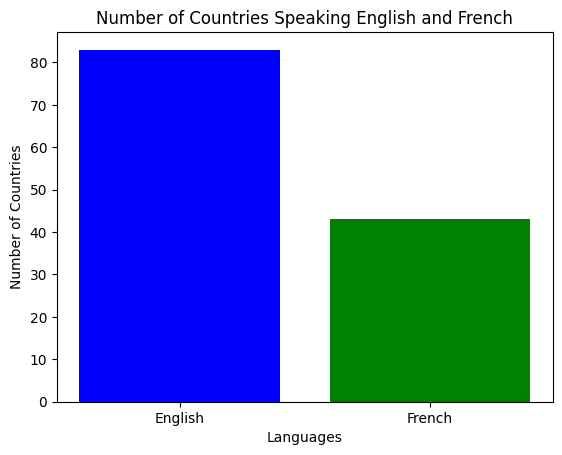

In [ ]:
# Count occurrences of English and French languages
english_count = df['Language'].str.contains('English').sum()
french_count = df['Language'].str.contains('French').sum()

# Plotting
languages = ['English', 'French']
counts = [english_count, french_count]

plt.bar(languages, counts, color=['blue', 'green'])
plt.xlabel('Languages')
plt.ylabel('Number of Countries')
plt.title('Number of Countries Speaking English and French')
plt.show()

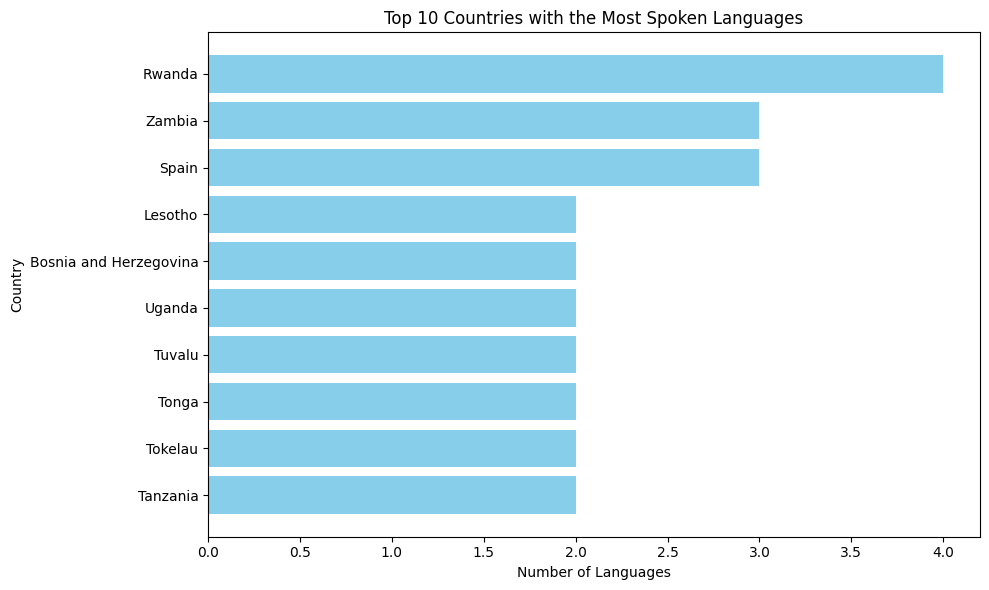

In [ ]:
# Count the number of languages spoken in each country
df['Num_Languages'] = df['Language'].str.split(',').apply(lambda x: len(x))

# Sort the dataframe by the number of languages spoken
df_sorted = df.sort_values(by='Num_Languages', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Country'], df_sorted['Num_Languages'], color='skyblue')
plt.xlabel('Number of Languages')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Spoken Languages')
plt.gca().invert_yaxis()  # Invert y-axis to have the country with the most languages at the top
plt.tight_layout()
plt.show()